![CC-BY-SA](https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by-sa.svg)


This notebook was created by [Bernardo Freitas Paulo da Costa](http://www.im.ufrj.br/bernardofpc),
and is licensed under Creative Commons BY-SA.

Antes de enviar este Teste, verifique que tudo está funcionando como esperado.
Por exemplo, **rode o código inteiro, do zero**.
Para isso, vá no menu, escolha _Kernel_, depois _Restart & Run All_.

Verifique, também, que você respondeu todas as questões:
* as questões de código têm `YOUR CODE HERE` (e você pode apagar o `raise NotImplemented` ao incluir sua resposta)
* as questões discursivas têm "YOUR ANSWER HERE".

--- José Wilson Conceição de Souza
    DRE: 122071379

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def veryclose(a, b): return np.isclose(a, b, atol=1e-12, rtol=1e-12)

# A convergência do método de Newton

## Questão 1: Lista de iterados do método de Newton

Dê abaixo o método de Newton, começando a partir do ponto x0, e retornando a lista de todos os pontos gerados.
O método para quando:
- ou o tamanho do passo é menor do que `atol`;
- ou o tamanho do passo, relativo ao (valor absoluto do) próximo iterado, é menor do que `rtol`;
- ou forem realizadas mais do que `maxiter` iterações.

In [3]:
def newton(f, df, x0, atol=1e-8, rtol=1e-8, maxiter=100):
    pontos=[x0]
    inter=0
    while True:
        i=pontos[inter]
        xn=i-f(i)/df(i)
        pontos.append(xn)
        inter+=1
        if abs(xn-i)<=atol or abs((xn-i)/xn)<=rtol or inter>maxiter:
            return pontos

In [4]:
newton(np.sin, np.cos,3)

[3, 3.142546543074278, 3.141592653300477, 3.141592653589793]

In [5]:
L = newton(np.sin, np.cos, 3)
assert len(L) == 4
assert np.isclose(L[-1], np.pi)

In [6]:
assert np.isclose(L[-2], np.pi)
assert not veryclose(L[-2], np.pi)

In [7]:
def poly1(x):
    return x**3 - x + 1

Dê a derivada da função acima

In [8]:
def d_poly1(x):
    return 3*x**2-1

In [9]:
L = newton(poly1, d_poly1, 1, atol=1e-9)
assert len(L) == 22
assert abs(poly1(L[-1])) < 1e-8

## Questão 2: Olhando uma convergência

Observe o gráfico dos iterados produzidos pelo método.
Como se deu a convergência?

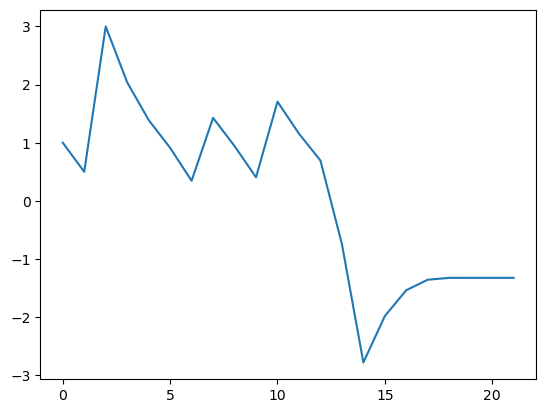

In [10]:
plt.plot(L)

**RESPOSTA:**

_A converergêrcia ocorreu com variás oscilações ao decorrer das interações. Inici-se com $x_0=1$, em seguinda, $x_1=3$ e, a partir da 18 interação a função começa a encontrar uma raíz, que atenda as condições de parada. Assim, o com os critérios de parada padrão, a função para em $n=21$._

Faça um gráfico da função polinomial que ajude a entender porque isso aconteceu.

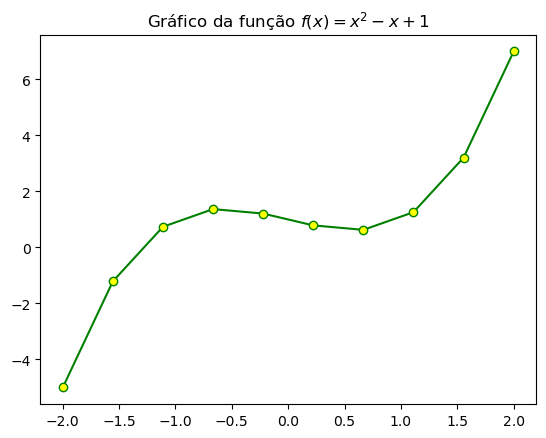

In [11]:
import numpy as np
x=np.linspace(-2,2,10)
y=(poly1(x))
plt.title("Gráfico da função $f(x)=x^2-x+1$")
plt.plot(x,y,color='green',linestyle='solid',marker='o', markerfacecolor='yellow')
#plt.cmap("blue")
ax = plt.gca()

In [12]:
l = ax.lines[0]

valores = l.get_ydata()
assert -8 < min(valores) < -1
assert 10 > max(valores) > 2

O que você deduz?

**RESPOSTA**

_Observa-se que se traçarmos uma reta tangente ao ponto $x=1$, sua interseção com o gráfico será em algum ponto após o $x=2$ (como dito antes, será em $x_1=3)$. Assim, concluimos que devido o formato da curva da função no intervalo $[-2, 2]$ (onde está a raíz), o método de Newton oscila bastante, mas sem muito trabalho para encontrar a raíz._


## Pontos periódicos

É possível que, após 2 iterações do Método de Newton, estejamos próximos do ponto inicial.
Se "acertarmos a mira", voltaremos exatamente ao ponto inicial.

## Questão 3: Equação de pontos periódicos

Determine uma equação **polinomial** que é satisfeita por um ponto 2-periódico para o método de Newton,
aplicado à função polinomial $x^3 - x + 1$.

Sugestão:
- Primeiro, deixe em função de uma variável $y$ que representa o "próximo ponto", e simplifique o que puder.
- Em seguida, substitua $y = N(x)/D(x)$, e elimine os denominadores para obter um polinômio. 

**RESPOSTA**

Seja $f(x)=x^3-x+1$. Assim,

$$y=x-\dfrac{f(x)}{f'(x)}\Rightarrow y=x-\dfrac{x^3-x+1}{3x^2-1}$$
$$y=\dfrac{2x^3-1}{3x^2-1}=\dfrac{N(x)}{D(x)}\Rightarrow N(x)=2x^3-1,\;\; D(x)=3x^2-1 $$

Precisamos calcular agora o próximo ponto, vamos chama-lo de $q$, ou seja:
$$q=y-\dfrac{f(y)}{f'(y)}$$
Além disso, queremos que ele retorne ao ponto inicial, logo, devemos igula-lo à $x$. Temos então que resolver a expressão:

$$q=\dfrac{N(x)}{D(x)}-\dfrac{f\left(\dfrac{N(x)}{D(x)}\right)}{f'\left(\dfrac{N(x)}{D(x)}\right)}=x$$
Calculando $f(y)/f'(y)$ ficamos com
$$\dfrac{N(x)}{D(x)}-\dfrac{N(x)^3-N(x)D(x)^2+D(x)^3}{3N(x)^2D(x)-D(x)^3}-x=0$$

Resolvendo, obtemos então

$$ \dfrac{3N(x)^3-N(x)D(x)^2-N(x)^3+N(x)D(x)^2-D(x)^3}{3N(x)^2D(x)-D(x)^3}-x=\dfrac{2N(x)^3-D(x)^3-x\cdot D(x)(3N(x)^2-D(x)^2)}{3N(x)^2D(x)-D(x)^3}=0$$

$$2N(x)^3-D(x)^3-x\cdot D(x)(3N(x)^2-D(x)^2)=0$$

Multiplicando por $-1$, ficamos com o polinômio

$$p(x)=x\cdot D(x)(3N(x)^2-D(x)^2)-2N(x)^3+D(x)^3$$



Qual o grau deste polinômio?

Grau 9, pois o grau máximo do termo entre parênteses é 6 e o de $D(x)$ é 2, então o termo $x\cdot D(x)(3N(x)^2-D(x)^2)$ tem grau $ = 9$. Para os demais termos teremos $gr(N(x)^3)=9,\;\; gr(D(x)^3)=6$.

Agora, defina este polinômio.

Dica: use o numerador e denominador como variáveis intermediárias!

In [13]:
def periodo2(x):
    N=2*(x**3)-1
    D=3*(x**2)-1
    return x*(3*D*(N**2)-(D**3))-2*(N**3)+(D**3)

In [14]:
assert 0.1 < periodo2(1/np.sqrt(3)) < 10

## Questão 4: Análise dos pontos de período 2

Faça um gráfico deste polinômio.

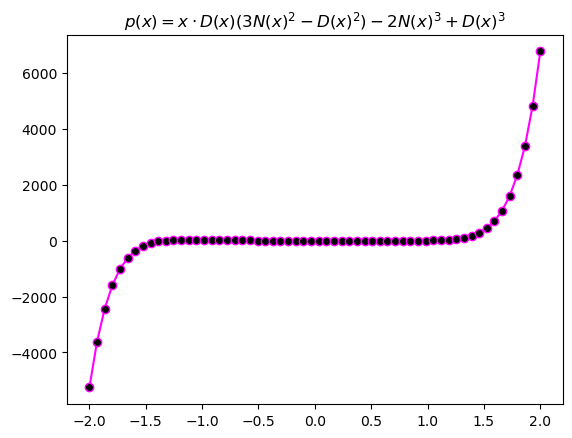

In [15]:
x=np.linspace(-2,2,60)
y=periodo2(x)
plt.title('$p(x)=x\cdot D(x)(3N(x)^2-D(x)^2)-2N(x)^3+D(x)^3$')
plt.plot(x,y,color='magenta',linestyle='solid',marker='o', markerfacecolor='black')



Faça mais um gráfico, que (junto com o anterior) convença você que este polinômio só tem uma raiz.

Text(0.5, 1.0, 'Comparação')

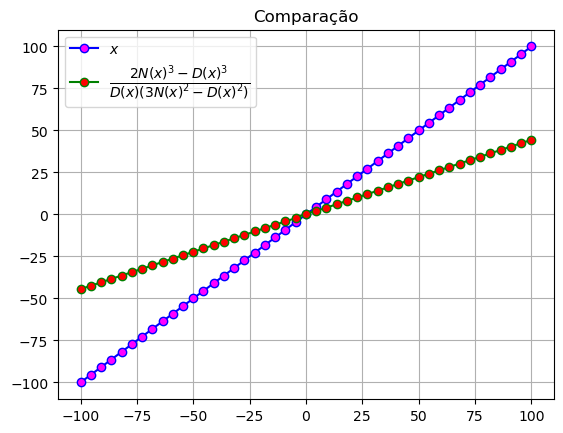

In [16]:
x=np.linspace(-100,100,45)
N=2*(x**3)-1
D=3*(x**2)-1
y1=x
y2=(2*(N**3)-(D**3))/(3*D*(N**2)-(D**3))
plt.plot(x,y1,color='blue',linestyle='solid',marker='o', markerfacecolor='magenta', label='$x$')
plt.plot(x,y2,color='green',linestyle='solid',marker='o', markerfacecolor='red',
label='$\dfrac{2N(x)^3-D(x)^3}{D(x)(3N(x)^2-D(x)^2)}$')
plt.legend()
plt.grid()
plt.title('Comparação')

Que raiz é esta?
Porque este ponto de período 2 faz sentido?

**RESPOSTA**

_É a raíz comum às duas retas, logo, é fácil ver que somente haverá esse ponto de interseção entre elas, logo o polinômio aterior só terá uma raíz. O ponto de período 2 faz sentido pelo fato de que as distâncias entre as retas serem constante, logo, cria-se uma reflexão infinita quando tomado um ponto em alguma das retas, o que gera um comportamento similar no polinômio._

## Questão 5: Zeros duplos

Vamos usar Newton fora das hipóteses de convergência quadrática...

In [17]:
def p2(x): return (x - 3)**2
def dp2(x): return 2*x - 6

L = newton(p2, dp2, 4, atol=1e-12, rtol=1e-12)
assert len(L) == 40

Faça um gráfico da convergência dos erros

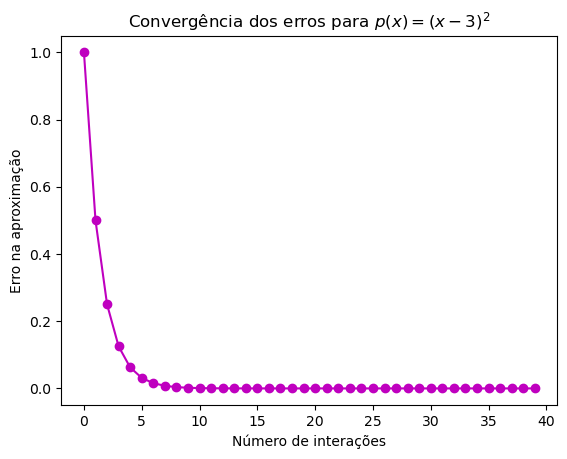

In [18]:
lista=range(len(L))
y=[abs(L[i]-3) for i in lista]
plt.plot(range(len(L)),y,'mo-')
plt.title('Convergência dos erros para $p(x)=(x-3)^2$')
plt.xlabel('Número de interações')
plt.ylabel('Erro na aproximação')
ax = plt.gca()

In [19]:
l = ax.get_lines()[0]
values = l.get_ydata()

assert len(values) == 40
assert max(values) == 1
assert min(values) < 1e-10

In [20]:
assert len(ax.get_xlabel()) > 5

Qual a velocidade de convergência destas iterações?

**RESPOSTA**

_Fazendo uma análise nos valores, notei que converge da forma $\dfrac{1}{2^n}$, onde $n$ é a n-ésima interação._

Qual a fórmula exata do "próximo ponto" para este caso?
Como isso explica o resultado acima?

**RESPOSTA**

Seja $x_{n+1}$ o próximo ponto, teremos $x_{n+1}=x_n-\dfrac{1}{2^n}$ 